In [ ]:
!nvidia-smi
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Nov 26 14:59:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn 
import seaborn as sns
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM, GRU, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping


# Load dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/portfolio_data.csv", index_col = 0)


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1520 entries, 5/1/2013 to 5/14/2019
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1520 non-null   float64
 1   DPZ     1520 non-null   float64
 2   BTC     1520 non-null   float64
 3   NFLX    1520 non-null   float64
dtypes: float64(4)
memory usage: 59.4+ KB


,AMZN,DPZ,BTC,NFLX
Date,,,,
5/1/2013,248.229996,51.190983,106.250000,30.415714
5/2/2013,252.550003,51.987320,98.099998,30.641428
5/3/2013,258.049988,52.446388,112.900002,30.492857
5/6/2013,255.720001,53.205257,109.599998,30.098572
5/7/2013,257.730011,54.151505,113.199997,29.464285


In [ ]:
df.tail()

,AMZN,DPZ,BTC,NFLX
Date,,,,
5/8/2019,1917.770020,283.149994,6171.959961,364.369995
5/9/2019,1899.869995,282.160004,6358.290039,362.750000
5/10/2019,1889.979980,278.369995,7191.359863,361.040009
5/13/2019,1822.680054,273.880005,7980.129883,345.260010
5/14/2019,1840.119995,272.859985,8183.830078,345.609985


In [ ]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


In [ ]:
df.index = pd.to_datetime(df.index)
df.drop(columns = ['BTC'],inplace = True)
df

,AMZN,DPZ,NFLX
Date,,,
2013-05-01,248.229996,51.190983,30.415714
2013-05-02,252.550003,51.987320,30.641428
2013-05-03,258.049988,52.446388,30.492857
2013-05-06,255.720001,53.205257,30.098572
2013-05-07,257.730011,54.151505,29.464285
...,...,...,...
2019-05-08,1917.770020,283.149994,364.369995
2019-05-09,1899.869995,282.160004,362.750000
2019-05-10,1889.979980,278.369995,361.040009


Text(0.5, 1.0, 'The stock price of Amazon')

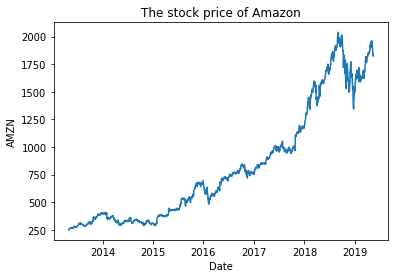

In [ ]:
sns.lineplot(data = df,x = df.index, y = df['AMZN']).set_title('The stock price of Amazon')

Text(0.5, 1.0, 'The stock price')

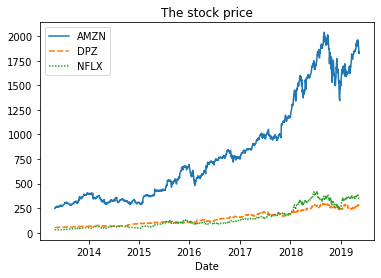

In [ ]:
sns.lineplot(data = df).set_title('The stock price')

In [ ]:
amzn = df.iloc[:,:1]
print("Shape of Amazon dataframe:", amzn.shape)
amzn

Shape of Amazon dataframe: (1520, 1)


,AMZN
Date,
2013-05-01,248.229996
2013-05-02,252.550003
2013-05-03,258.049988
2013-05-06,255.720001
2013-05-07,257.730011
...,...
2019-05-08,1917.770020
2019-05-09,1899.869995
2019-05-10,1889.979980


## Train test split

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
amzn_scal = scaler.fit_transform(amzn)



X_train_ori, X_ = train_test_split(
    amzn_scal, test_size =0.4, shuffle = False) #split train set and validation set
X_val_ori, X_test_ori = train_test_split(
    X_, test_size =0.5, shuffle = False) #split train set and validation set  
print(X_train_ori.shape, X_val_ori.shape, X_test_ori.shape,type(X_train_ori))


train_plot, t_plot = train_test_split(
    amzn, test_size =0.4, shuffle = False) #split train set and validation set

val_plot, test_plot = train_test_split(
    t_plot, test_size =0.5, shuffle = False) #split train set and validation set
print(train_plot.shape, val_plot.shape, test_plot.shape,type(train_plot))

(912, 1) (304, 1) (304, 1) <class 'numpy.ndarray'>
(912, 1) (304, 1) (304, 1) <class 'pandas.core.frame.DataFrame'>


                AMZN
Date                
2013-05-01  0.000000
2013-05-02  0.002412
2013-05-03  0.005482
2013-05-06  0.004181
2013-05-07  0.005303
...              ...
2016-12-05  0.285343
2016-12-06  0.288336
2016-12-07  0.291518
2016-12-08  0.289793
2016-12-09  0.290535

[912 rows x 1 columns]                 AMZN
Date                
2018-02-28  0.705763
2018-03-01  0.695157
2018-03-02  0.698953
2018-03-05  0.711994
2018-03-06  0.719826
...              ...
2019-05-08  0.932037
2019-05-09  0.922045
2019-05-10  0.916523
2019-05-13  0.878953
2019-05-14  0.888689

[304 rows x 1 columns]


Text(0.5, 1.0, 'Train validation and test set of he stock price of Amazon')

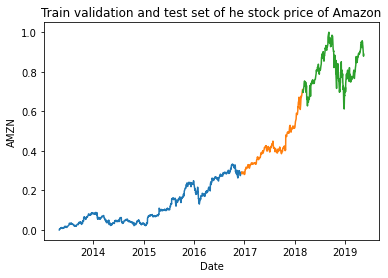

In [ ]:
# train_plot, test_plot = X_train_ori.copy(), X_test_ori.copy()

train_plot.iloc[:,:1] = X_train_ori
val_plot.iloc[:,:1] = X_val_ori
test_plot.iloc[:,:1] = X_test_ori

print(train_plot,test_plot)
sns.lineplot(data = train_plot, x = train_plot.index, y = train_plot['AMZN'])
sns.lineplot(data = val_plot, x = val_plot.index, y = val_plot['AMZN'])
sns.lineplot(data = test_plot, x = test_plot.index, y = test_plot['AMZN']).set_title('Train validation and test set of he stock price of Amazon')


## time series

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 5
X_train, y_train = create_dataset(X_train_ori, time_step)
X_val, y_val = create_dataset(X_val_ori, time_step)
X_test, y_test = create_dataset(X_test_ori, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (906, 5)
y_train:  (906,)
X_val:  (298, 5)
y_val:  (298,)
X_test:  (298, 5)
y_test (298,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_val =X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_val: ", X_val.shape)
print("X_test: ", X_test.shape)

X_train:  (906, 5, 1)
X_val:  (298, 5, 1)
X_test:  (298, 5, 1)


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

# # Build the LSTM model
# model_lstm = Sequential()
# model_lstm.add(LSTM(128, return_sequences=True, input_shape= (None, 1)))
# model_lstm.add(LSTM(64, return_sequences=False))
# model_lstm.add(Dense(25))
# model_lstm.add(Dense(1))

# # Compile the model
# model_lstm.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
# Train the model
# history = model_lstm.fit(X_train,y_train, validation_data=(X_test,y_test),batch_size=128, epochs=50)

In [ ]:
# import matplotlib.pyplot as plt

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(loss))

# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend(loc=0)
# plt.figure()


# plt.show()

# LSTM

## plot result

In [ ]:
def plot_loss(history, model_name,n,n1):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  mae = history.history['mae']
  val_mae = history.history['val_mae']
  epochs = range(len(loss))

  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title(f'Training and validation MSE of {model_name}')
  plt.legend(loc=0)
  # plt.figure()
  plt.savefig(fname = n)
  plt.show()

  plt.plot(epochs, mae, 'r', label='Training loss')
  plt.plot(epochs, val_mae, 'b', label='Validation loss')
  plt.title(f'Training and validation MAE of {model_name}')
  plt.legend(loc=0)
  # plt.figure()
  plt.savefig(fname = n1)
  plt.show()
  # 

  import os
from os import listdir
from google.colab.patches import cv2, cv2_imshow
# get the path/directory
batch_size_list =[32, 64, 128]
lr = [0.0001,0.001]
f_list = []
def im_grid(m):
  image_list = []

  for b in batch_size_list:
    for l in lr:
      f_list = []
      f_list.append("/content/")
      f_list.append(str(m))
      f_list.append(b)
      f_list.append(l)
      f_list.append(".png")

      f = ''.join((str(i) for i in f_list))
      image_list.append(f)
  return image_list


In [112]:
from prettytable import PrettyTable
def show_table(model_name,hist):
  history_list = hist
  table = PrettyTable([model_name,'batch size','learning rate',"MSE", 'MAE', "val_MSE","val_MAE"])
  table.float_format = "5.6"
  listi = [0,2,4,6,8,10]
  latex = []
  for i in listi:
    # print(history_list[i])
    p = pd.DataFrame(history_list[i+1].history).iloc[-1,:]
    # print(p,p[1])
    table.add_row([model_name,history_list[i][0],history_list[i][1],p[0],p[1],p[2],p[3]])
    latex.append([model_name,history_list[i][0],history_list[i][1],p[0],p[1],p[2],p[3]])
  print(table)
  return(pd.DataFrame(latex).to_latex(index = False))


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, mode='min'),
    # tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

## LSTM RMSprop

In [ ]:
model_lstmrr=Sequential()

model_lstmrr.add(LSTM(10,input_shape=(None,1),activation="relu"))

model_lstmrr.add(Dense(1))

model_lstmrr.compile(loss="mean_squared_error",optimizer="RMSprop",metrics=['mae'])
model_lstmrr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
str_n =[1.2,2]
str2 = ','.join(str(i) for i in str_n)
print(str2)

1.2,2


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


--------------------------batch size 32, learning rate 0.0001--------------------------
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10)                480       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
RMSprop320.0001


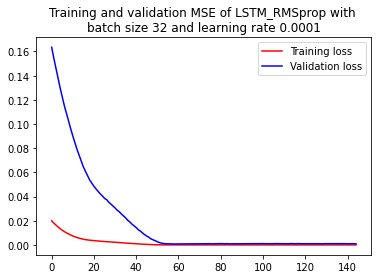

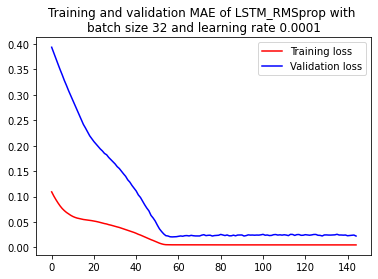

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


        loss       mae  val_loss   val_mae
140  0.00005  0.004854  0.000981  0.022912
141  0.00005  0.004878  0.001004  0.023337
142  0.00005  0.004870  0.001029  0.023742
143  0.00005  0.004853  0.001055  0.024246
144  0.00005  0.004853  0.000946  0.022280
--------------------------batch size 32, learning rate 0.001--------------------------
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 10)                480       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
RMSprop320.0001320.001


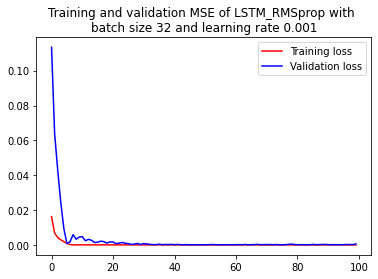

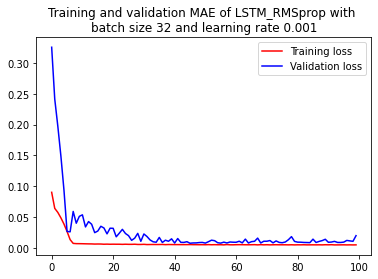

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


        loss       mae  val_loss   val_mae
95  0.000055  0.005267  0.000202  0.009628
96  0.000054  0.005139  0.000304  0.012413
97  0.000056  0.005230  0.000280  0.011628
98  0.000053  0.005117  0.000254  0.010935
99  0.000055  0.005205  0.000612  0.020112
--------------------------batch size 64, learning rate 0.0001--------------------------
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10)                480       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
RMSprop320.0001320.001640.0001


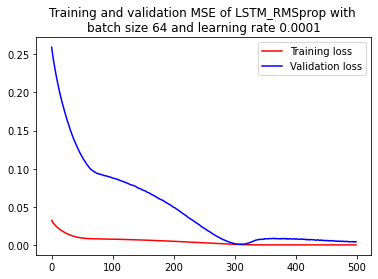

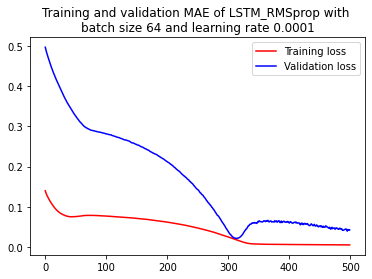

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


         loss       mae  val_loss   val_mae
495  0.000062  0.005661  0.003774  0.039786
496  0.000062  0.005702  0.004273  0.043943
497  0.000062  0.005636  0.004181  0.043233
498  0.000062  0.005621  0.004004  0.041884
499  0.000061  0.005632  0.004128  0.042980
--------------------------batch size 64, learning rate 0.001--------------------------
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 10)                480       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
RMSprop320.0001320.001640.0001640.001


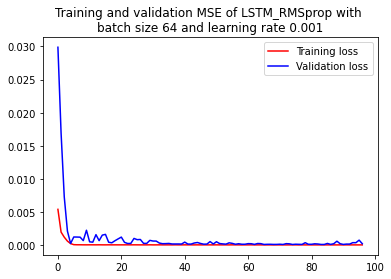

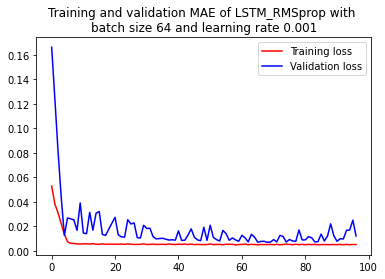

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


        loss       mae  val_loss   val_mae
92  0.000052  0.005015  0.000174  0.009781
93  0.000055  0.005333  0.000390  0.016803
94  0.000051  0.005052  0.000386  0.017037
95  0.000053  0.005244  0.000769  0.025119
96  0.000053  0.005227  0.000233  0.012207
--------------------------batch size 128, learning rate 0.0001--------------------------
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 10)                480       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
RMSprop320.0001320.001640.0001640.0011280.0001


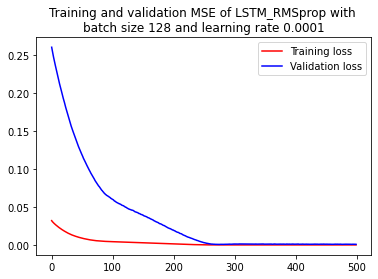

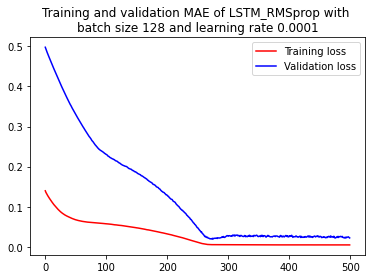

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


         loss       mae  val_loss   val_mae
495  0.000052  0.004921  0.000931  0.024098
496  0.000051  0.004900  0.000949  0.024411
497  0.000052  0.004922  0.000983  0.024997
498  0.000051  0.004922  0.000885  0.023300
499  0.000052  0.004891  0.000827  0.022255
--------------------------batch size 128, learning rate 0.001--------------------------
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 10)                480       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
RMSprop320.0001320.001640.0001640.0011280.00011280.001


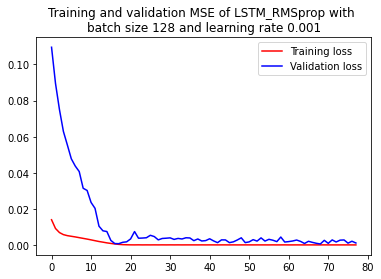

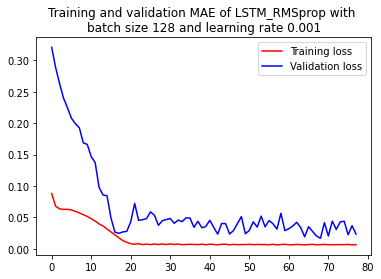

        loss       mae  val_loss   val_mae
73  0.000078  0.006473  0.002710  0.042711
74  0.000080  0.006547  0.002829  0.043905
75  0.000086  0.006806  0.001056  0.022318
76  0.000073  0.006222  0.002113  0.036706
77  0.000077  0.006488  0.001133  0.023342


In [ ]:
batch_size_list =[32, 64, 128]
lr = [0.0001,0.001]
# , 128.001,0.01
from keras.optimizers import SGD,RMSprop,Adam
opt_a = Adam(learning_rate=0.1)
str_n =["RMSprop"]

history_list = []
for b in batch_size_list:
  for l in lr:
    print(f'--------------------------batch size {b}, learning rate {l}--------------------------')
    opt_r = RMSprop(lr=l)
    model_lstmrr=Sequential()

    model_lstmrr.add(LSTM(10,input_shape=(None,1),activation="relu"))

    model_lstmrr.add(Dense(1))

    model_lstmrr.compile(loss="mean_squared_error",optimizer=opt_r,metrics=['mae'])
    model_lstmrr.summary()
    str_n.append(b)
    str_n.append(l)

    str2 = ''.join(str(i) for i in str_n)
    print(str2)
    historyr = model_lstmrr.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=500,batch_size=b,verbose=0,callbacks =my_callbacks)
    plot_loss(historyr,f'LSTM_RMSprop with \nbatch size {b} and learning rate {l}',
              f'LSTM_RMSprop_MSE {b}{l}.png',f'LSTM_RMSprop_MAE {b}{l}.png')
    print(pd.DataFrame(historyr.history).tail())
    history_list.append((b,l))
    history_list.append(historyr)



### result

In [ ]:
from prettytable import PrettyTable

table = PrettyTable(['Model','batch size','learning rate',"MSE", 'MAE', "val_MSE","val_MAE"])
table.float_format = "5.6"
listi = [0,2,4,6,8,10]
for i in listi:
  # print(history_list[i])
  p = pd.DataFrame(history_list[i+1].history).iloc[-1,:]
  # print(p,p[1])
  table.add_row(['LSTM_RMSprop',history_list[i][0],history_list[i][1],p[0],p[1],p[2],p[3]])
print(table)

+--------------+------------+---------------+----------+----------+----------+----------+
|    Model     | batch size | learning rate |   MSE    |   MAE    | val_MSE  | val_MAE  |
+--------------+------------+---------------+----------+----------+----------+----------+
| LSTM_RMSprop |     32     |    0.000100   | 0.000050 | 0.004853 | 0.000946 | 0.022280 |
| LSTM_RMSprop |     32     |    0.001000   | 0.000055 | 0.005205 | 0.000612 | 0.020112 |
| LSTM_RMSprop |     64     |    0.000100   | 0.000061 | 0.005632 | 0.004128 | 0.042980 |
| LSTM_RMSprop |     64     |    0.001000   | 0.000053 | 0.005227 | 0.000233 | 0.012207 |
| LSTM_RMSprop |    128     |    0.000100   | 0.000052 | 0.004891 | 0.000827 | 0.022255 |
| LSTM_RMSprop |    128     |    0.001000   | 0.000077 | 0.006488 | 0.001133 | 0.023342 |
+--------------+------------+---------------+----------+----------+----------+----------+


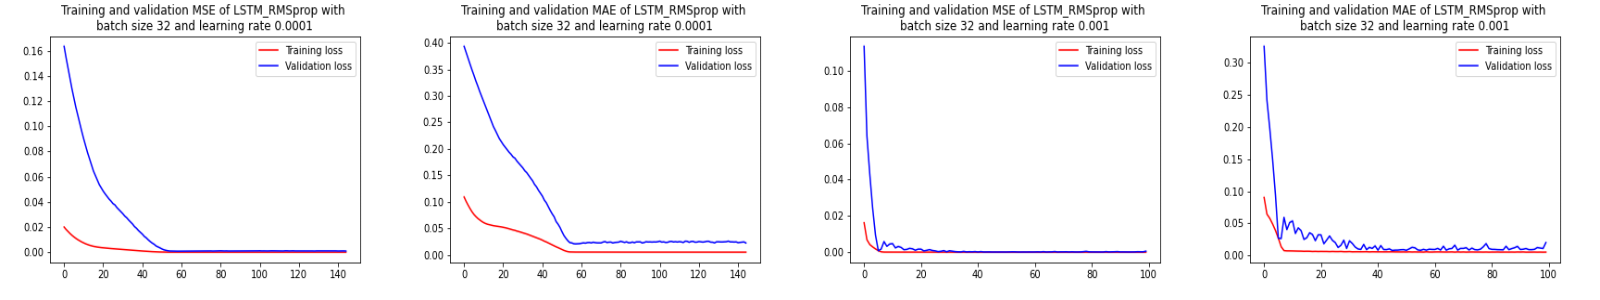

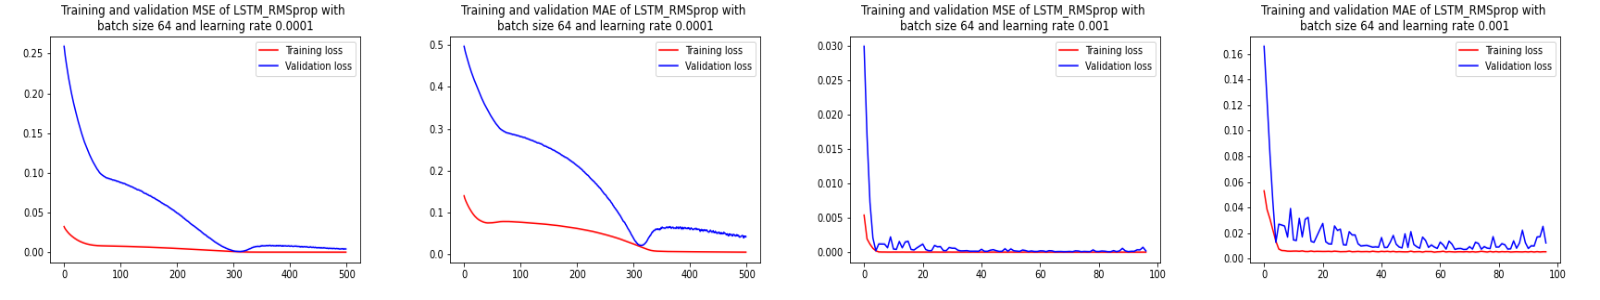

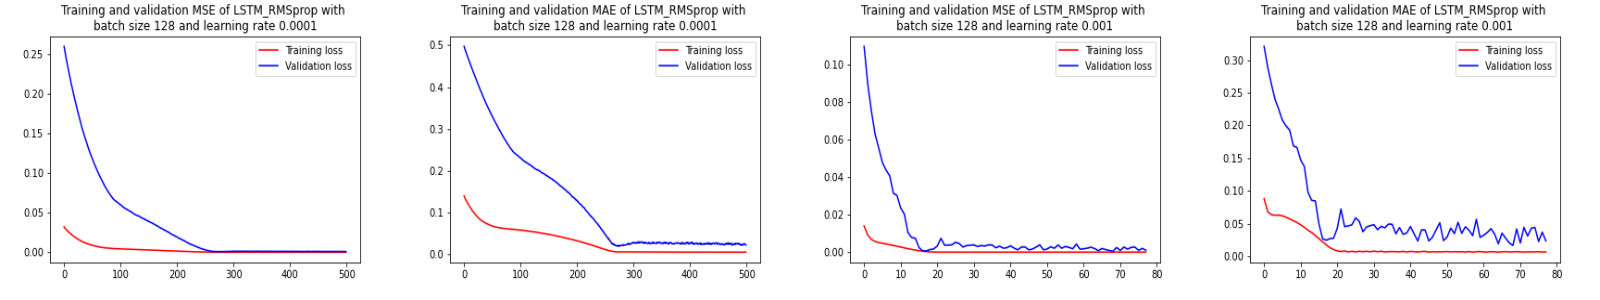

['/content/LSTM_RMSprop_MSE 320.0001.png', '/content/LSTM_RMSprop_MSE 320.001.png', '/content/LSTM_RMSprop_MSE 640.0001.png', '/content/LSTM_RMSprop_MSE 640.001.png', '/content/LSTM_RMSprop_MSE 1280.0001.png', '/content/LSTM_RMSprop_MSE 1280.001.png']


In [ ]:

il_mae = im_grid('LSTM_RMSprop_MAE ')

il_mse = im_grid('LSTM_RMSprop_MSE ')
r = [0,2,4]
for i in r:
  im1 = cv2.imread(il_mse[i])
  im1 = cv2.resize(im1, (400, 300)) 
  im2 = cv2.imread(il_mae[i])
  im2 = cv2.resize(im2, (400, 300)) 

  im3 = cv2.imread(il_mse[i+1])
  im3 = cv2.resize(im3, (400, 300)) 
  im4 = cv2.imread(il_mae[i+1])
  im4 = cv2.resize(im4, (400, 300))
  images = np.hstack([im1,im2,im3,im4])

  cv2_imshow(images)



## LSTM_Adam

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


--------------------------batch size 32, learning rate 0.0001--------------------------
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 10)                480       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


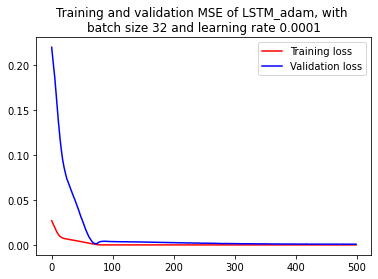

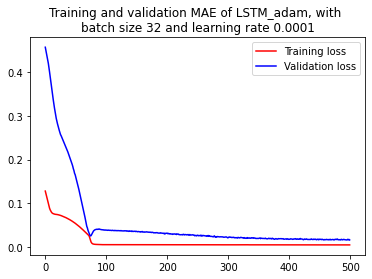

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


         loss       mae  val_loss   val_mae
495  0.000053  0.005018  0.000834  0.016714
496  0.000054  0.005062  0.000911  0.017849
497  0.000054  0.005081  0.000828  0.016644
498  0.000053  0.005040  0.000879  0.017390
499  0.000053  0.005026  0.000799  0.016307
--------------------------batch size 32, learning rate 0.001--------------------------
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 10)                480       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


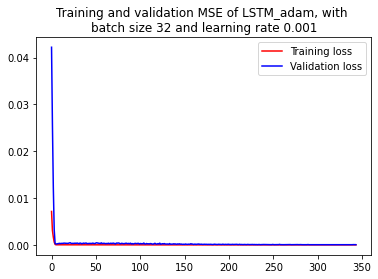

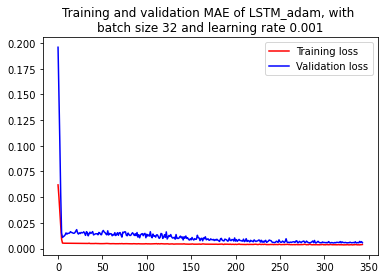

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


         loss       mae  val_loss   val_mae
339  0.000029  0.003607  0.000076  0.005566
340  0.000029  0.003580  0.000097  0.006982
341  0.000031  0.003758  0.000080  0.005931
342  0.000031  0.003784  0.000097  0.006740
343  0.000034  0.003951  0.000077  0.005656
--------------------------batch size 64, learning rate 0.0001--------------------------
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 10)                480       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


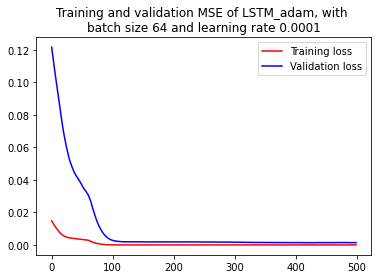

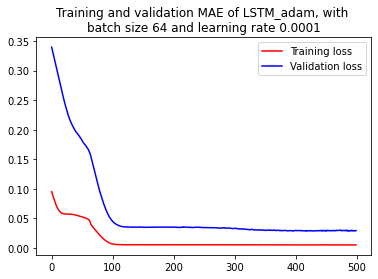

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


         loss       mae  val_loss   val_mae
495  0.000053  0.005014  0.001445  0.028879
496  0.000053  0.005010  0.001468  0.029228
497  0.000053  0.005031  0.001433  0.028714
498  0.000053  0.005019  0.001437  0.028761
499  0.000053  0.005029  0.001474  0.029298
--------------------------batch size 64, learning rate 0.001--------------------------
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 10)                480       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


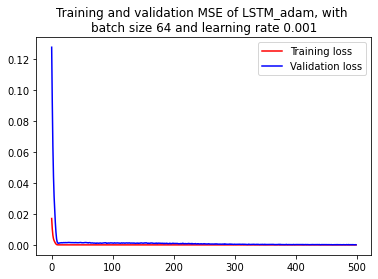

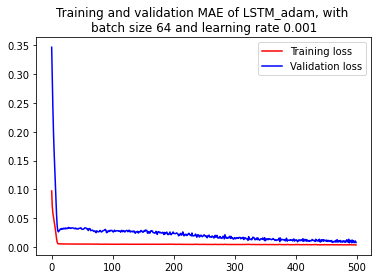

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


         loss       mae  val_loss   val_mae
495  0.000034  0.003900  0.000193  0.010773
496  0.000033  0.003829  0.000118  0.007645
497  0.000034  0.004036  0.000172  0.009966
498  0.000033  0.003806  0.000188  0.010626
499  0.000033  0.003850  0.000123  0.007900
--------------------------batch size 128, learning rate 0.0001--------------------------
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 10)                480       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


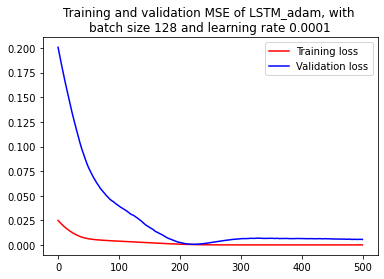

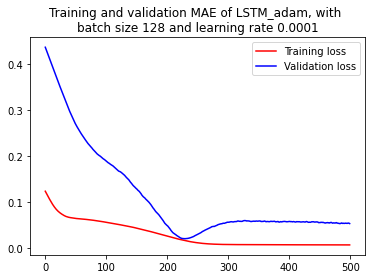

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


         loss       mae  val_loss   val_mae
495  0.000087  0.006938  0.005700  0.053781
496  0.000087  0.006932  0.005763  0.054245
497  0.000087  0.006930  0.005786  0.054418
498  0.000087  0.006924  0.005735  0.054058
499  0.000087  0.006930  0.005638  0.053371
--------------------------batch size 128, learning rate 0.001--------------------------
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 10)                480       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


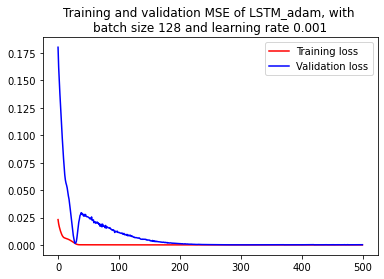

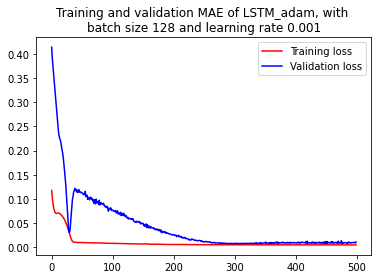

         loss       mae  val_loss   val_mae
495  0.000053  0.005046  0.000190  0.009751
496  0.000053  0.005056  0.000209  0.010359
497  0.000053  0.005068  0.000203  0.010189
498  0.000054  0.005063  0.000172  0.009121
499  0.000054  0.005061  0.000233  0.011193


In [ ]:
batch_size_list =[32, 64, 128]
lr = [0.0001,0.001]
# , 128.001,0.01
from keras.optimizers import SGD,RMSprop,Adam
opt_a = Adam(learning_rate=0.1)
str_n =["RMSprop"]

history_list_a = []
for b in batch_size_list:
  for l in lr:
    print(f'--------------------------batch size {b}, learning rate {l}--------------------------')
    opt_r = Adam(lr=l)
    model_lstmrr=Sequential()

    model_lstmrr.add(LSTM(10,input_shape=(None,1),activation="relu"))

    model_lstmrr.add(Dense(1))

    model_lstmrr.compile(loss="mean_squared_error",optimizer=opt_r,metrics=['mae'])
    model_lstmrr.summary()
    str_n.append(b)
    str_n.append(l)

    
    historyr = model_lstmrr.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=500,batch_size=b,verbose=0,callbacks =my_callbacks)
    plot_loss(historyr,f'LSTM_adam, with \nbatch size {b} and learning rate {l}',
              f'LSTM_adam_MSE {b}{l}.png',f'LSTM_adam_MAE {b}{l}.png')
    history_list_a.append((b,l))
    history_list_a.append(historyr)
    print(pd.DataFrame(historyr.history).tail())



### result

In [115]:
a = show_table('LSTM_RMSprop',history_list)
b = show_table('LSTM_Adam  ',history_list_a)
print(a,'\n\n\n',b)

+--------------+------------+---------------+----------+----------+----------+----------+
| LSTM_RMSprop | batch size | learning rate |   MSE    |   MAE    | val_MSE  | val_MAE  |
+--------------+------------+---------------+----------+----------+----------+----------+
| LSTM_RMSprop |     32     |    0.000100   | 0.000050 | 0.004853 | 0.000946 | 0.022280 |
| LSTM_RMSprop |     32     |    0.001000   | 0.000055 | 0.005205 | 0.000612 | 0.020112 |
| LSTM_RMSprop |     64     |    0.000100   | 0.000061 | 0.005632 | 0.004128 | 0.042980 |
| LSTM_RMSprop |     64     |    0.001000   | 0.000053 | 0.005227 | 0.000233 | 0.012207 |
| LSTM_RMSprop |    128     |    0.000100   | 0.000052 | 0.004891 | 0.000827 | 0.022255 |
| LSTM_RMSprop |    128     |    0.001000   | 0.000077 | 0.006488 | 0.001133 | 0.023342 |
+--------------+------------+---------------+----------+----------+----------+----------+
+-------------+------------+---------------+----------+----------+----------+----------+
| LSTM_Adam

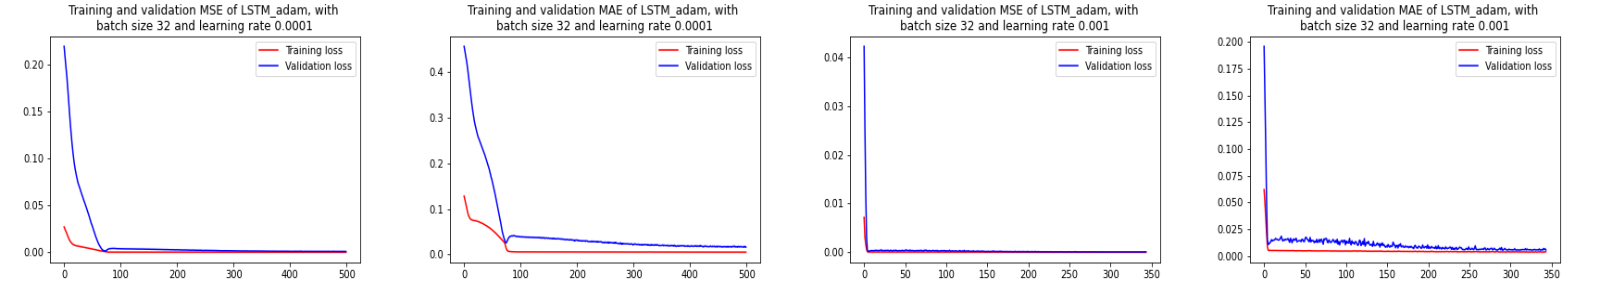

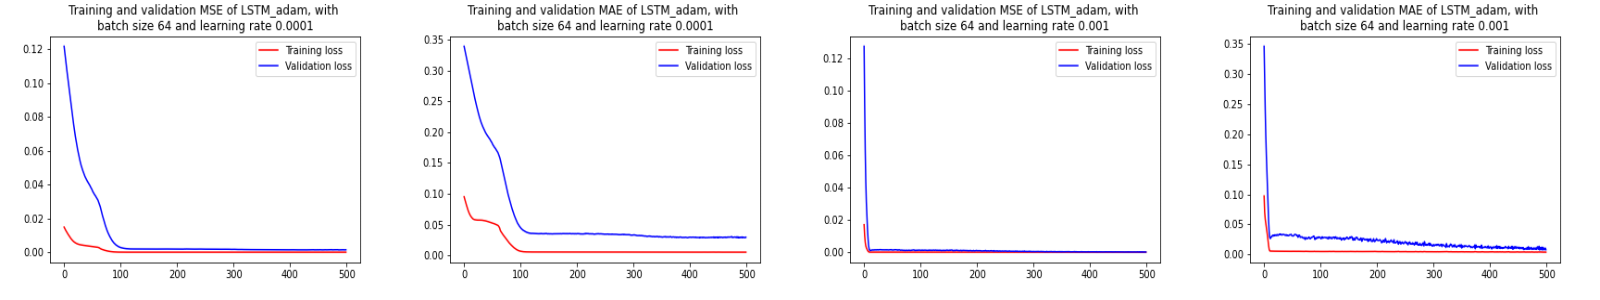

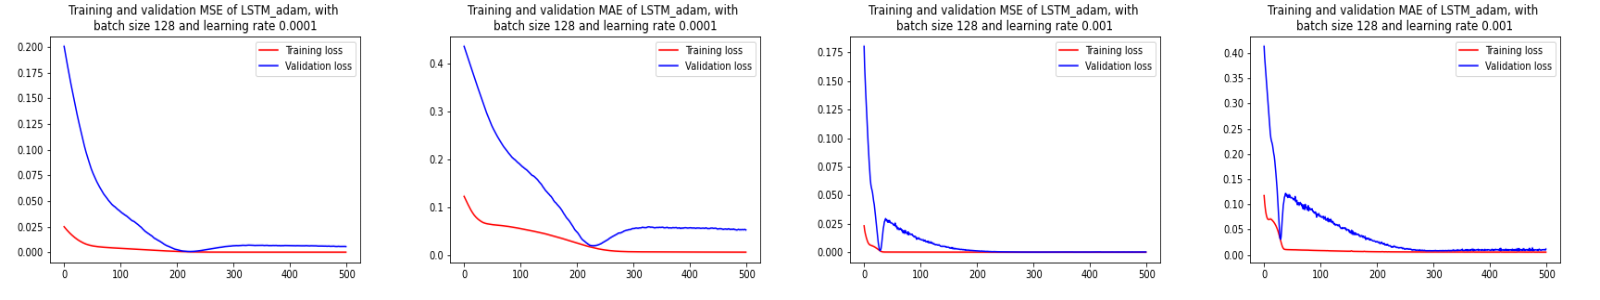

In [ ]:
il_mae = im_grid('LSTM_adam_MAE ')

il_mse = im_grid('LSTM_adam_MSE ')
r = [0,2,4]
for i in r:
  im1 = cv2.imread(il_mse[i])
  im1 = cv2.resize(im1, (400, 300)) 
  im2 = cv2.imread(il_mae[i])
  im2 = cv2.resize(im2, (400, 300)) 

  im3 = cv2.imread(il_mse[i+1])
  im3 = cv2.resize(im3, (400, 300)) 
  im4 = cv2.imread(il_mae[i+1])
  im4 = cv2.resize(im4, (400, 300))
  images = np.hstack([im1,im2,im3,im4])

  cv2_imshow(images)




## **The best model is LSTM_Adam   | batch size    32     | learning   0.001000   | 0.000034 | 0.003951 | 0.000077 | 0.005656 **

## LSTM perdict

In [ ]:
batch_size_list =[32]
lr = [0.001]

for b in batch_size_list:
  for l in lr:
    print(f'--------------------------batch size {b}, learning rate {l}--------------------------')
    opt_r = Adam(lr=l)
    model_lstm=Sequential()

    model_lstm.add(LSTM(10,input_shape=(None,1),activation="relu"))

    model_lstm.add(Dense(1))

    model_lstm.compile(loss="mean_squared_error",optimizer=opt_r,metrics=['mae'])
    model_lstm.summary()

    model_lstm.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=500,batch_size=b,verbose=1,callbacks =my_callbacks)
    model_lstm.predict(X_test)



In [ ]:
train_predict = model_lstm.predict(X_train)
test_predict = model_lstm.predict(X_test)


10/10 [==============================] - 0s 2ms/step


In [ ]:
test_predict.shape
X_test_ori.shape

(304, 1)

In [ ]:
look_back = 5
# look_back=time_step
# trainPredictPlot = np.empty_like(closedf)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(X_test_ori)
print(testPredictPlot.shape)
testPredictPlot[:] = np.nan
testPredictPlot[look_back:len(testPredictPlot)-1] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

(304, 1)
Test predicted data:  (304, 1)


(304, 1)
MSE and MAE of test set are:  0.01493898 0.09872423


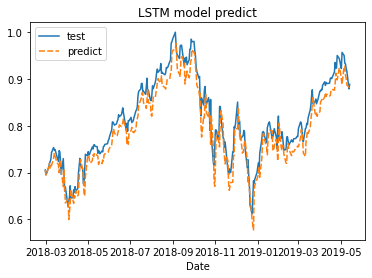

In [ ]:
print(test_plot.shape)
predict_plot = test_plot.copy()
predict_plot.iloc[look_back:len(predict_plot)-1,:1] = test_predict
# print(predict_plot)

from keras.metrics import mean_squared_error
mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()
result_gru = pd.concat([test_plot,predict_plot],axis=1)
result_gru.columns = ['test',"predict"]
sns.lineplot(data = result_gru,).set(title ='LSTM model predict')
print('MSE and MAE of test set are: ',mse(y_test, test_predict).numpy(),mae(y_test, test_predict).numpy())

# GRU

## build GRU model

In [ ]:
model_gru=Sequential()
model_gru.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model_gru.add(GRU(32,return_sequences=True))
model_gru.add(GRU(32))
model_gru.add(Dropout(0.20))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error',optimizer='adam',metric =['mae'])
model_gru.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_13 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_14 (GRU)                (None, 32)                6336      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
_________________________________________________________________


## GRU RMSprop

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


--------------------------batch size 32, learning rate 0.0001--------------------------
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 32)             3360      
                                                                 
 gru_1 (GRU)                 (None, 5, 32)             6336      
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
___________________________

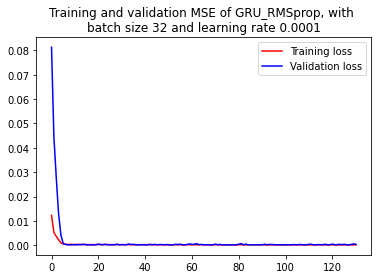

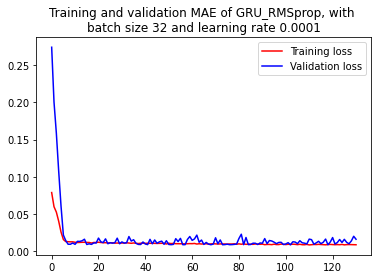

--------------------------batch size 32, learning rate 0.001--------------------------
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 5, 32)             3360      
                                                                 
 gru_4 (GRU)                 (None, 5, 32)             6336      
                                                                 
 gru_5 (GRU)                 (None, 32)                6336      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
____________________________

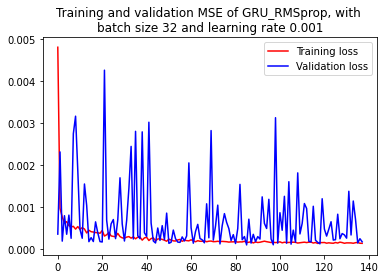

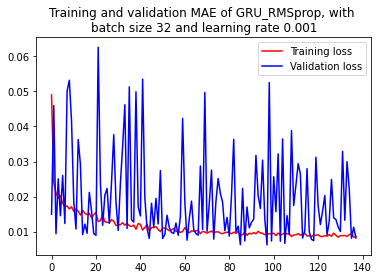

--------------------------batch size 64, learning rate 0.0001--------------------------
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 5, 32)             3360      
                                                                 
 gru_7 (GRU)                 (None, 5, 32)             6336      
                                                                 
 gru_8 (GRU)                 (None, 32)                6336      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
___________________________

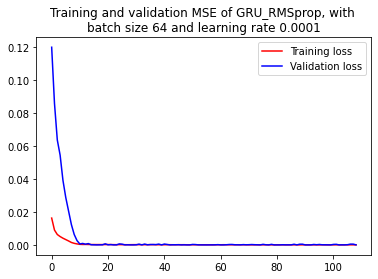

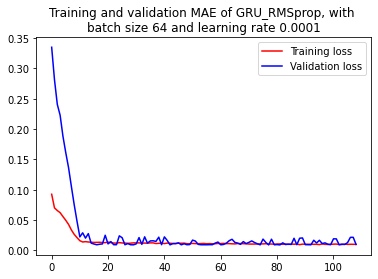

--------------------------batch size 64, learning rate 0.001--------------------------
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 5, 32)             3360      
                                                                 
 gru_10 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_11 (GRU)                (None, 32)                6336      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
____________________________

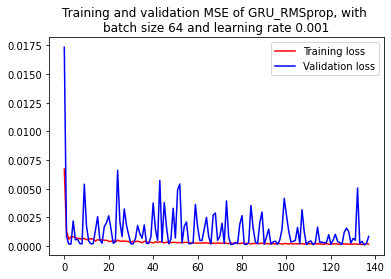

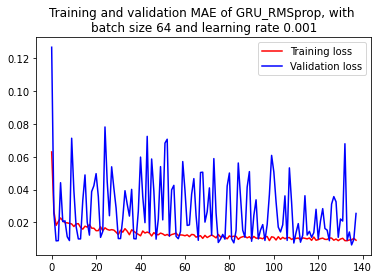

--------------------------batch size 128, learning rate 0.0001--------------------------
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_13 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_14 (GRU)                (None, 32)                6336      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
__________________________

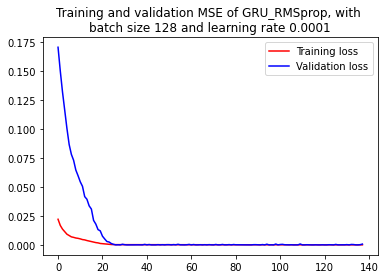

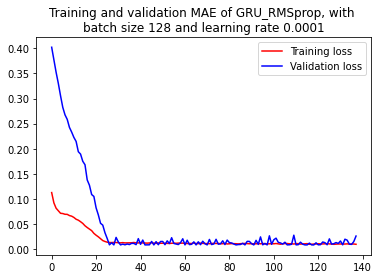

--------------------------batch size 128, learning rate 0.001--------------------------
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_16 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_17 (GRU)                (None, 32)                6336      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
___________________________

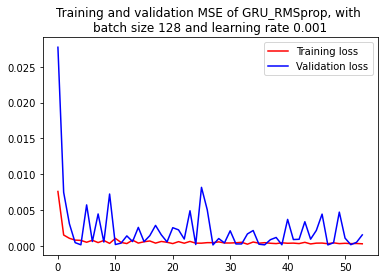

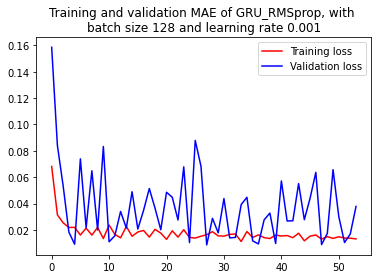

In [ ]:
batch_size_list =[32, 64, 128]
lr = [0.0001,0.001]
# , 128.001,0.01
from keras.optimizers import SGD,RMSprop,Adam
opt_a = Adam(learning_rate=0.1)
opt_r = RMSprop(lr=0.001)

str_n =["RMSprop"]

history_list_gru_r = []
for b in batch_size_list:
  for l in lr:
    print(f'--------------------------batch size {b}, learning rate {l}--------------------------')
    opt_r = RMSprop(lr=l)
    model_gru=Sequential()
    model_gru.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
    model_gru.add(GRU(32,return_sequences=True))
    model_gru.add(GRU(32))
    model_gru.add(Dropout(0.20))
    model_gru.add(Dense(1))
    model_gru.compile(loss='mean_squared_error',optimizer =opt_r,metrics =['mae'])
    model_gru.summary()

    
    historyr = model_gru.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=500,batch_size=b,verbose=0,callbacks =my_callbacks)
    plot_loss(historyr,f'GRU_RMSprop, with \nbatch size {b} and learning rate {l}',
              f'GRU_RMSprop_MSE {b}{l}.png',f'GRU_RMSprop_MAE {b}{l}.png')
    history_list_gru_r.append((b,l))
    history_list_gru_r.append(historyr)



### result

In [ ]:
show_table('GRU_RMSprop',history_list_gru_r)

+-------------+------------+---------------+----------+----------+----------+----------+
| GRU_RMSprop | batch size | learning rate |   MSE    |   MAE    | val_MSE  | val_MAE  |
+-------------+------------+---------------+----------+----------+----------+----------+
| GRU_RMSprop |     32     |    0.000100   | 0.000162 | 0.008722 | 0.000421 | 0.016122 |
| GRU_RMSprop |     32     |    0.001000   | 0.000127 | 0.008643 | 0.000164 | 0.008190 |
| GRU_RMSprop |     64     |    0.000100   | 0.000214 | 0.009982 | 0.000208 | 0.009930 |
| GRU_RMSprop |     64     |    0.001000   | 0.000149 | 0.009157 | 0.000832 | 0.025456 |
| GRU_RMSprop |    128     |    0.000100   | 0.000223 | 0.010152 | 0.000888 | 0.026516 |
| GRU_RMSprop |    128     |    0.001000   | 0.000316 | 0.013174 | 0.001557 | 0.037799 |
+-------------+------------+---------------+----------+----------+----------+----------+


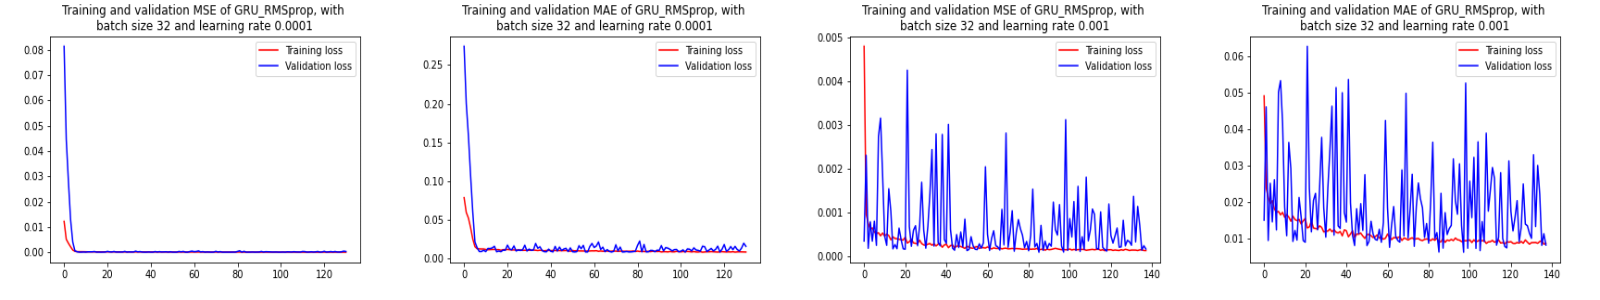

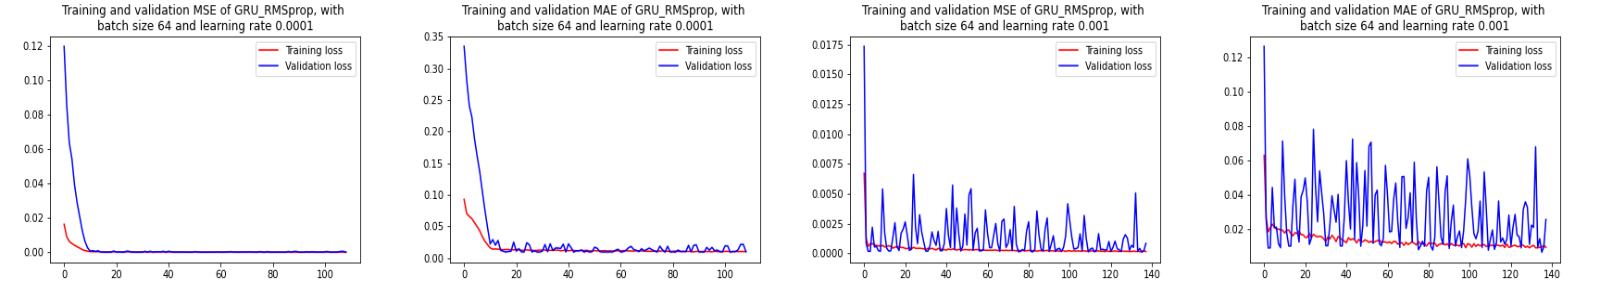

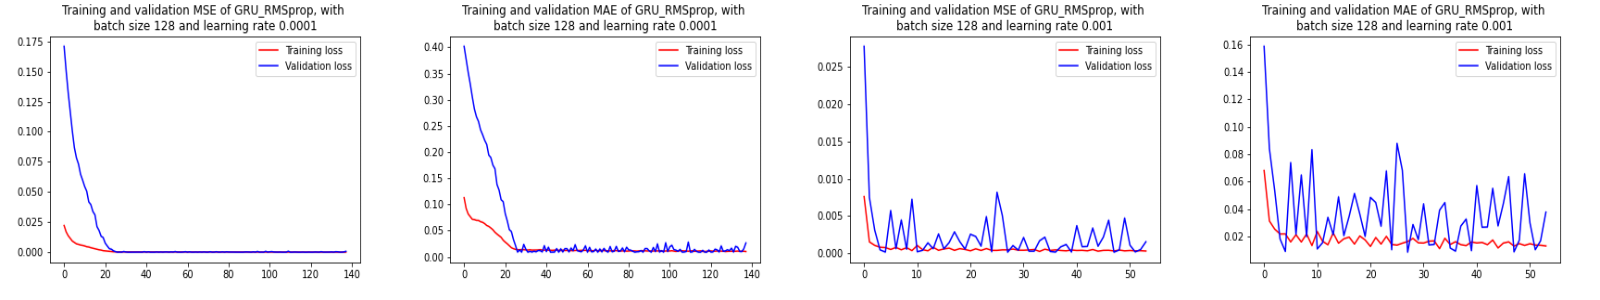

In [ ]:
il_mae = im_grid('GRU_RMSprop_MAE ')

il_mse = im_grid('GRU_RMSprop_MSE ')
r = [0,2,4]
for i in r:
  im1 = cv2.imread(il_mse[i])
  im1 = cv2.resize(im1, (400, 300)) 
  im2 = cv2.imread(il_mae[i])
  im2 = cv2.resize(im2, (400, 300)) 

  im3 = cv2.imread(il_mse[i+1])
  im3 = cv2.resize(im3, (400, 300)) 
  im4 = cv2.imread(il_mae[i+1])
  im4 = cv2.resize(im4, (400, 300))
  images = np.hstack([im1,im2,im3,im4])

  cv2_imshow(images)

## GRU adam

--------------------------batch size 32, learning rate 0.0001--------------------------
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_42 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_43 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_44 (GRU)                (None, 32)                6336      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
___________________________

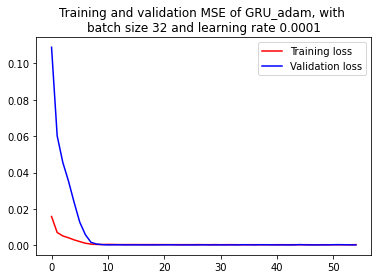

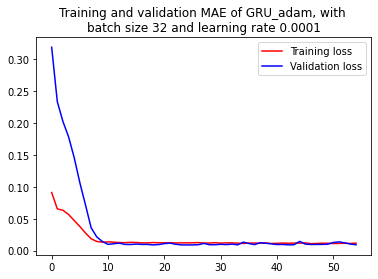

--------------------------batch size 32, learning rate 0.001--------------------------
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_45 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_46 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_47 (GRU)                (None, 32)                6336      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
____________________________

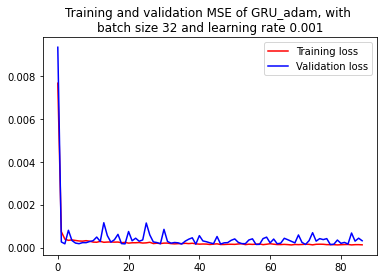

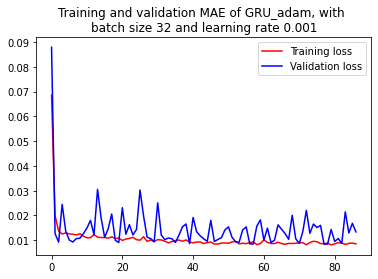

--------------------------batch size 64, learning rate 0.0001--------------------------
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_48 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_49 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_50 (GRU)                (None, 32)                6336      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
___________________________

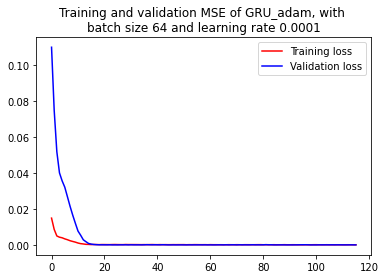

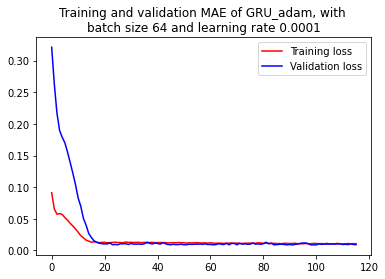

--------------------------batch size 64, learning rate 0.001--------------------------
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_51 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_52 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_53 (GRU)                (None, 32)                6336      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
____________________________

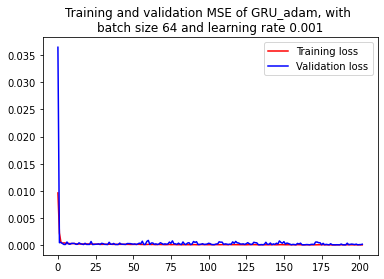

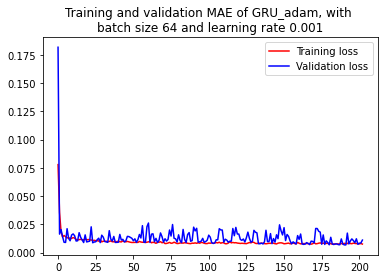

--------------------------batch size 128, learning rate 0.0001--------------------------
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_54 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_55 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_56 (GRU)                (None, 32)                6336      
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
__________________________

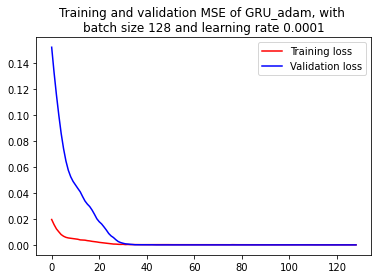

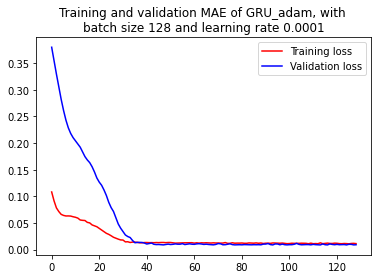

--------------------------batch size 128, learning rate 0.001--------------------------
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_57 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_58 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_59 (GRU)                (None, 32)                6336      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
___________________________

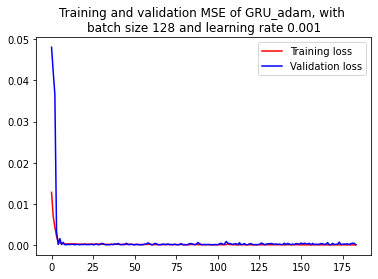

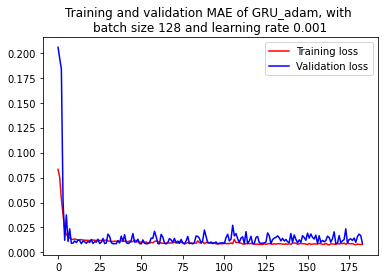

In [119]:
batch_size_list =[32, 64, 128]
lr = [0.0001,0.001]
# , 128.001,0.01
from keras.optimizers import SGD,RMSprop,Adam

str_n =["RMSprop"]

history_list_gru_a = []
for b in batch_size_list:
  for l in lr:
    print(f'--------------------------batch size {b}, learning rate {l}--------------------------')
    opt_a = Adam(learning_rate=l)

    model_gru=Sequential()
    model_gru.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
    model_gru.add(GRU(32,return_sequences=True))
    model_gru.add(GRU(32))
    model_gru.add(Dropout(0.20))
    model_gru.add(Dense(1))
    model_gru.compile(loss='mean_squared_error',optimizer=opt_a,metrics =['mae'])
    model_gru.summary()

    
    historyr = model_gru.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=500,batch_size=b,verbose=0,callbacks =my_callbacks)
    plot_loss(historyr,f'GRU_adam, with \nbatch size {b} and learning rate {l}',
              f'GRU_adam_MSE {b}{l}.png',f'GRU_adam_MAE {b}{l}.png')
    history_list_gru_a.append((b,l))
    history_list_gru_a.append(historyr)



### result

In [120]:
c = show_table('GRU_RMSprop',history_list_gru_r)
print(history_list_gru_a)
d = show_table('GRU_Adam',history_list_gru_a)
print(c,'\n\n\n',d)

+-------------+------------+---------------+----------+----------+----------+----------+
| GRU_RMSprop | batch size | learning rate |   MSE    |   MAE    | val_MSE  | val_MAE  |
+-------------+------------+---------------+----------+----------+----------+----------+
| GRU_RMSprop |     32     |    0.000100   | 0.000162 | 0.008722 | 0.000421 | 0.016122 |
| GRU_RMSprop |     32     |    0.001000   | 0.000127 | 0.008643 | 0.000164 | 0.008190 |
| GRU_RMSprop |     64     |    0.000100   | 0.000214 | 0.009982 | 0.000208 | 0.009930 |
| GRU_RMSprop |     64     |    0.001000   | 0.000149 | 0.009157 | 0.000832 | 0.025456 |
| GRU_RMSprop |    128     |    0.000100   | 0.000223 | 0.010152 | 0.000888 | 0.026516 |
| GRU_RMSprop |    128     |    0.001000   | 0.000316 | 0.013174 | 0.001557 | 0.037799 |
+-------------+------------+---------------+----------+----------+----------+----------+
[(32, 0.0001), <keras.callbacks.History object at 0x7fce71356510>, (32, 0.001), <keras.callbacks.History objec

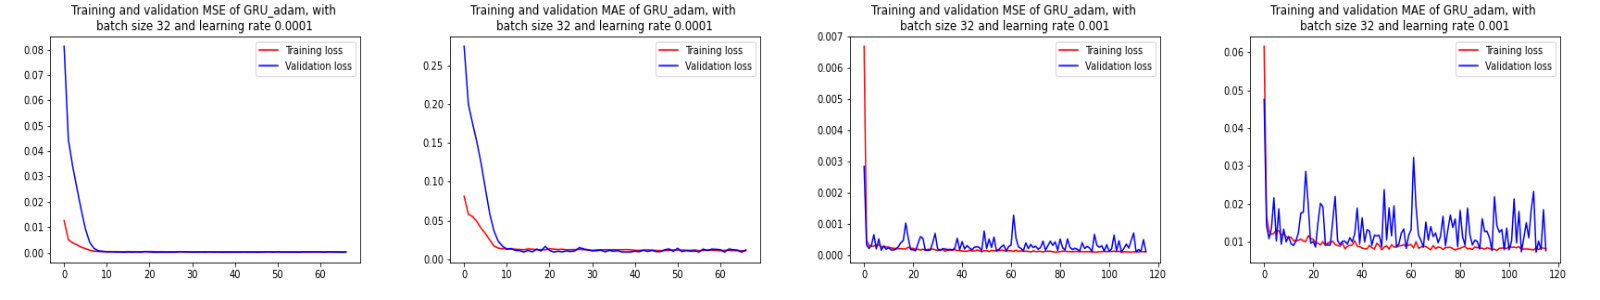

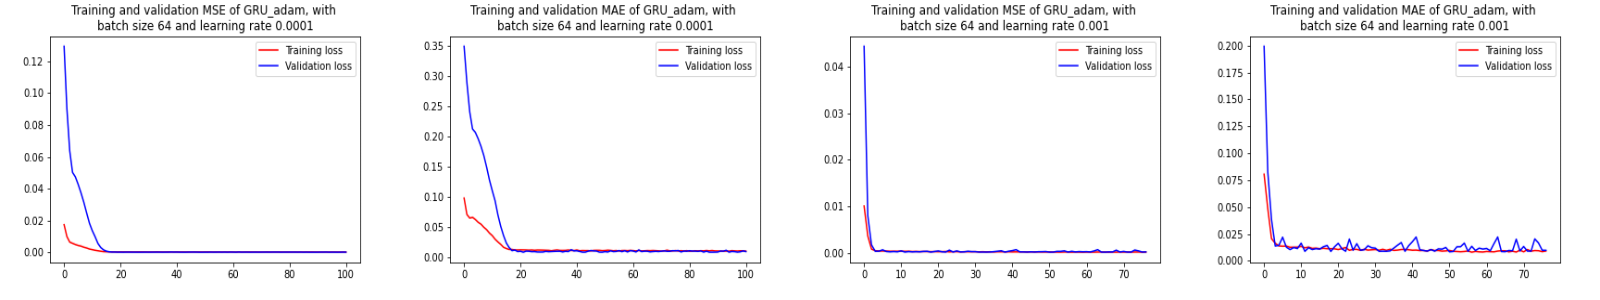

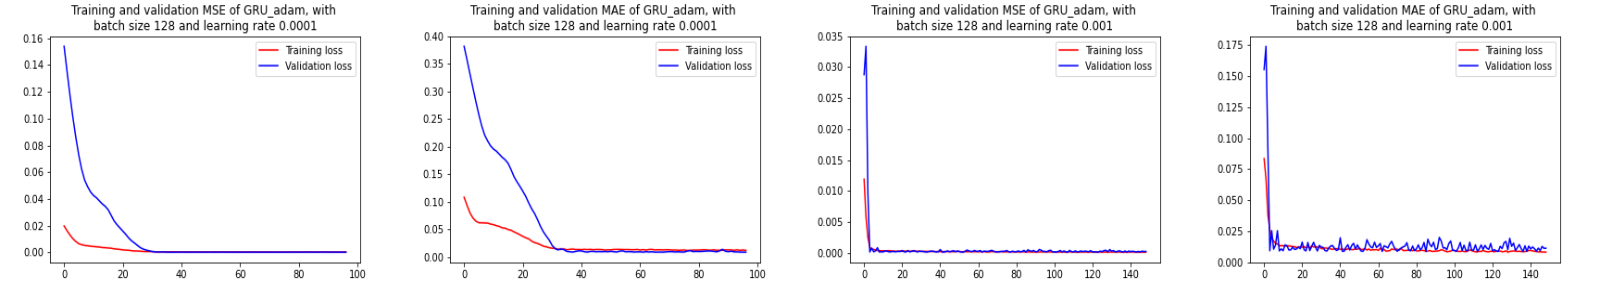

In [ ]:
il_mae = im_grid('GRU_adam_MAE ')

il_mse = im_grid('GRU_adam_MSE ')
r = [0,2,4]
for i in r:
  im1 = cv2.imread(il_mse[i])
  im1 = cv2.resize(im1, (400, 300)) 
  im2 = cv2.imread(il_mae[i])
  im2 = cv2.resize(im2, (400, 300)) 

  im3 = cv2.imread(il_mse[i+1])
  im3 = cv2.resize(im3, (400, 300)) 
  im4 = cv2.imread(il_mae[i+1])
  im4 = cv2.resize(im4, (400, 300))
  images = np.hstack([im1,im2,im3,im4])

  cv2_imshow(images)

## The best model is | GRU_Adam |  batch size   32     |  learning  0.000100   | 0.000263 | 0.010732 | 0.000261 | 0.011892 |


## GRU predict

In [ ]:
batch_size_list =[32]
lr = [0.0001]
# , 128.001,0.01
from keras.optimizers import SGD,RMSprop,Adam

str_n =["RMSprop"]

for b in batch_size_list:
  for l in lr:
    print(f'--------------------------batch size {b}, learning rate {l}--------------------------')
    opt_a = Adam(learning_rate=l)

    model_gru=Sequential()
    model_gru.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
    model_gru.add(GRU(32,return_sequences=True))
    model_gru.add(GRU(32))
    model_gru.add(Dropout(0.20))
    model_gru.add(Dense(1))
    model_gru.compile(loss='mean_squared_error',optimizer=opt_a,metrics =['mae'])
    model_gru.summary()

    
    model_gru.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=500,batch_size=b,verbose=1,callbacks =my_callbacks)


--------------------------batch size 32, learning rate 0.0001--------------------------
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_39 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_40 (GRU)                (None, 5, 32)             6336      
                                                                 
 gru_41 (GRU)                (None, 32)                6336      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
___________________________

In [ ]:
test_predict_gru = model_gru.predict(X_test)


10/10 [==============================] - 1s 3ms/step


(304, 1)
                test   predict
Date                          
2018-02-28  0.705763  0.705763
2018-03-01  0.695157  0.695157
2018-03-02  0.698953  0.698953
2018-03-05  0.711994  0.711994
2018-03-06  0.719826  0.719826
...              ...       ...
2019-05-08  0.932037  0.913510
2019-05-09  0.922045  0.914931
2019-05-10  0.916523  0.914775
2019-05-13  0.878953  0.907175
2019-05-14  0.888689  0.888689

[304 rows x 2 columns]
MSE and MAE of test set are:  0.014074844 0.095880166


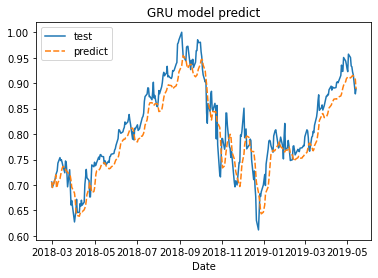

In [ ]:
print(test_plot.shape)
predict_plot_gru = test_plot.copy()
predict_plot_gru.iloc[look_back:len(predict_plot_gru)-1,:1] = test_predict_gru
# print(predict_plot_gru)

# print(train_plot,test_plot)
# sns.lineplot(data = train_plot, x = train_plot.index, y = train_plot['AMZN'])
# sns.lineplot(data = val_plot, x = val_plot.index, y = val_plot['AMZN'])
result_gru = pd.concat([test_plot,predict_plot_gru],axis=1)
result_gru.columns = ['test',"predict"]
print(result_gru)
sns.lineplot(data = result_gru,).set(title ='GRU model predict')
# sns.lineplot(data = predict_plot_gru, x = predict_plot_gru.index, y = predict_plot_gru['AMZN']), x = test_plot.index, y = test_plot['AMZN']
# from keras.metrics import mean_squared_error
# mse = tf.keras.losses.MeanSquaredError()
# mae = tf.keras.losses.MeanAbsoluteError()
print('MSE and MAE of test set are: ',mse(y_test, test_predict_gru).numpy(),mae(y_test, test_predict_gru).numpy())